# Loan Prediction

## Introduction

### Process Steps
> EDA (Exploratory Data Analysis)

> Handling Missing Values

> Handling Categorical and Numerical Data

> Scaling

> PCA (Principle Component Analyze)

> Logistic Regression Model

> Random Forest Model

> Prediction on Test Data

## Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, download_plotlyjs, iplot
import warnings
warnings.filterwarnings('ignore')

# Let us Import the Important Libraries  to train our Model for Machine Learning 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # To deal with Categorical Data in Target Vector.
from sklearn.model_selection import train_test_split  # To Split the dataset into training data and testing data.
from sklearn.model_selection import cross_val_score   # To check the accuracy of the model.
from sklearn.preprocessing import Imputer   # To deal with the missing values
from sklearn.preprocessing import StandardScaler   # To appy scaling on the dataset.
from sklearn.linear_model import LinearRegression, LogisticRegression

***Loading train data:***

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_d796a7821cb14d9da275345dd74c86d6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='your_api_key',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_d796a7821cb14d9da275345dd74c86d6.get_object(Bucket='ibmcapstone-donotdelete-pr-dg5vjwlnynkxzq',Key='credit_train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_train = pd.read_csv(body)
df_train.head()


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


***First look on train data:***

In [3]:
df_train = df_train.reset_index()

In [4]:
df_train.shape

(100514, 20)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 20 columns):
index                           100514 non-null int64
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Curren

In [6]:
df_train['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

**Encoding levels**

In [7]:
df_train['Loan Status'] = df_train['Loan Status'].map({'Fully Paid': int('0'), 'Charged Off': int('1')})

In [8]:
df_train['Loan Status'].value_counts()

0.0    77361
1.0    22639
Name: Loan Status, dtype: int64

In [9]:
df_train['Term'].value_counts()

Short Term    72208
Long Term     27792
Name: Term, dtype: int64

In [10]:
df_train['Term'] = df_train['Term'].map({'Short Term': int('0'), 'Long Term': int('1')})

In [11]:
df_train['Term'].value_counts()

0.0    72208
1.0    27792
Name: Term, dtype: int64

In [12]:
df_train['Years in current job'] = df_train['Years in current job'].map({'10+ years': int('0'), '2 years': int('1'), '3 years': int('2'), '< 1 year': int('3'), '5 years': int('4'), '1 year': int('5'), '4 year': int('6'), '6 year': int('7'), '7 year': int('8'), '8 year': int('9'), '9 year': int('10')})

In [13]:
df_train['Years in current job'].value_counts()

0.0    31121
1.0     9134
2.0     8169
3.0     8164
4.0     6787
5.0     6460
Name: Years in current job, dtype: int64

In [14]:
df_train['Home Ownership'].value_counts()

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64

In [15]:
df_train['Home Ownership'] = df_train['Home Ownership'].map({'Home Ownership': int('0'), 'Rent': int('1'), 'Own Home': int('2'), 'Have Mortgage': int('3')})

In [16]:
df_train['Home Ownership'].value_counts()

1.0    42194
2.0     9182
Name: Home Ownership, dtype: int64

In [17]:
df_train['Purpose'].value_counts()

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

In [18]:
df_train['Purpose'] = df_train['Purpose'].map({'Dept Consolidation': int('0'), 'other': int('1'), 'Home Improvements': int('2'), 'Other': int('1'), 'Business Loan': int('2'), 'Buy a Car': int('3'), 'Medical bill': int('4'), 'Buy House': int('5'), 'Take a trip': int('6'), 'major_purchase': int('7'), 'small_business': int('8'), 'moving': int('9'), 'wedding': int('10'), 'vacation': int('11'), 'Educational Expenses': int('12'), 'renewable_energy': int('13')})

In [19]:
df_train['Purpose'].value_counts()

1.0     9287
2.0     7408
3.0     1265
5.0      678
7.0      352
8.0      283
9.0      150
10.0     115
11.0     101
12.0      99
13.0      10
Name: Purpose, dtype: int64

**Checking null values, Deleting unnecessary columns**

In [20]:
del(df_train['Loan ID'])
del(df_train['Customer ID'])

In [21]:
df_train = df_train[np.isnan(df_train['Loan Status']) != True]

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
index                           100000 non-null int64
Loan Status                     100000 non-null float64
Current Loan Amount             100000 non-null float64
Term                            100000 non-null float64
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            69835 non-null float64
Home Ownership                  51376 non-null float64
Purpose                         19748 non-null float64
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maximum Open Credit             99998 non-null float64
Ban

In [23]:
df_train.shape

(100000, 18)

In [24]:
del(df_train['Months since last delinquent'])

In [25]:
df_train_na = df_train.dropna()

In [26]:
df_train_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5556 entries, 25 to 99990
Data columns (total 17 columns):
index                        5556 non-null int64
Loan Status                  5556 non-null float64
Current Loan Amount          5556 non-null float64
Term                         5556 non-null float64
Credit Score                 5556 non-null float64
Annual Income                5556 non-null float64
Years in current job         5556 non-null float64
Home Ownership               5556 non-null float64
Purpose                      5556 non-null float64
Monthly Debt                 5556 non-null float64
Years of Credit History      5556 non-null float64
Number of Open Accounts      5556 non-null float64
Number of Credit Problems    5556 non-null float64
Current Credit Balance       5556 non-null float64
Maximum Open Credit          5556 non-null float64
Bankruptcies                 5556 non-null float64
Tax Liens                    5556 non-null float64
dtypes: float64(16), int64

In [27]:
df_train_na.shape

(5556, 17)

**Checking correlation between features**

In [28]:
corr = df_train_na.corr()
corr

,index,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
index,1.000000,-0.019448,-0.004821,-0.037820,-0.017248,-0.003967,-0.011972,0.001885,-0.027737,-0.001636,0.008253,0.005593,0.015509,-0.016524,0.005582,0.022275,0.004500
Loan Status,-0.019448,1.000000,-0.205856,0.111796,0.450765,-0.050195,-0.026442,-0.018725,0.013698,0.029417,0.003910,0.021724,-0.029703,0.031103,-0.018208,-0.039999,-0.010621
Current Loan Amount,-0.004821,-0.205856,1.000000,-0.057433,-0.090651,0.005081,0.004870,-0.002319,0.012420,-0.020406,0.009305,0.002340,0.002234,-0.006789,0.033296,-0.004197,0.001993
Term,-0.037820,0.111796,-0.057433,1.000000,0.045091,0.103102,0.002712,0.072476,0.009802,0.127410,0.060492,0.063630,-0.006377,0.064029,0.037370,-0.009292,0.007707
Credit Score,-0.017248,0.450765,-0.090651,0.045091,1.000000,-0.013616,-0.025508,-0.003760,0.008224,0.008037,0.008879,0.017168,-0.010680,0.019676,-0.002615,-0.009131,-0.006976
Annual Income,-0.003967,-0.050195,0.005081,0.103102,-0.013616,1.000000,-0.071511,0.081243,0.054151,0.506888,0.187643,0.144955,0.027698,0.289350,0.115776,0.006446,0.036894
Years in current job,-0.011972,-0.026442,0.004870,0.002712,-0.025508,-0.071511,1.000000,-0.110501,0.034050,-0.104210,-0.196027,-0.018776,-0.093515,-0.094740,-0.038687,-0.084261,-0.039524
Home Ownership,0.001885,-0.018725,-0.002319,0.072476,-0.003760,0.081243,-0.110501,1.000000,-0.005286,0.075675,0.152634,0.033521,0.034868,0.149979,0.095210,0.031778,0.014823
Purpose,-0.027737,0.013698,0.012420,0.009802,0.008224,0.054151,0.034050,-0.005286,1.000000,0.008961,-0.001238,0.026139,-0.015266,-0.022323,0.000210,-0.011215,-0.018231
Monthly Debt,-0.001636,0.029417,-0.020406,0.127410,0.008037,0.506888,-0.104210,0.075675,0.008961,1.000000,0.222836,0.420813,0.029691,0.459309,0.104423,0.018298,0.031990


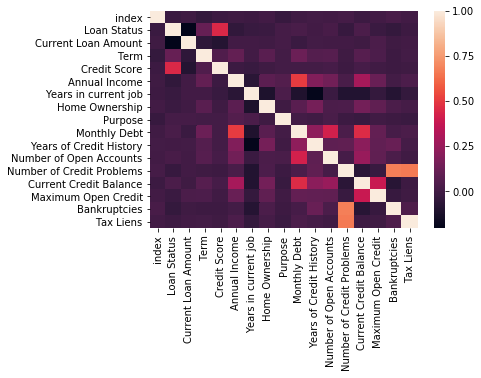

In [29]:
sns.heatmap(corr)

In [30]:
corr['Credit Score'][abs(corr['Credit Score']) > 0.1]

Loan Status     0.450765
Credit Score    1.000000
Name: Credit Score, dtype: float64

In [31]:
corr['Annual Income'][abs(corr['Annual Income']) > 0.1]

Term                       0.103102
Annual Income              1.000000
Monthly Debt               0.506888
Years of Credit History    0.187643
Number of Open Accounts    0.144955
Current Credit Balance     0.289350
Maximum Open Credit        0.115776
Name: Annual Income, dtype: float64

In [32]:
corr['Years in current job'][abs(corr['Years in current job']) > 0.1]

Years in current job       1.000000
Home Ownership            -0.110501
Monthly Debt              -0.104210
Years of Credit History   -0.196027
Name: Years in current job, dtype: float64

In [33]:
corr['Maximum Open Credit'][abs(corr['Maximum Open Credit']) > 0.1]

Annual Income             0.115776
Monthly Debt              0.104423
Current Credit Balance    0.392183
Maximum Open Credit       1.000000
Name: Maximum Open Credit, dtype: float64

In [34]:
corr['Bankruptcies'][abs(corr['Bankruptcies']) > 0.1]

Years of Credit History      0.116489
Number of Credit Problems    0.677902
Bankruptcies                 1.000000
Name: Bankruptcies, dtype: float64

In [35]:
corr['Tax Liens'][abs(corr['Tax Liens']) > 0.1]

Number of Credit Problems    0.663241
Tax Liens                    1.000000
Name: Tax Liens, dtype: float64

**Filling missing values with looking correlated columns**

In [36]:
y1 = df_train_na['Credit Score'].to_numpy()
x1 = df_train_na['Loan Status'].to_numpy()


In [37]:
y1 = y1.reshape(5556,1)
x1 = x1.reshape(5556,1)

In [38]:
linReg1 = LinearRegression()
linReg1.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
df_train['Credit Score'] = df_train.apply(lambda x: linReg1.predict(x['Loan Status'].reshape(1,1))[0][0] if np.isnan(x['Credit Score']) else x['Credit Score'], axis = 1)

In [40]:
df_train['Credit Score'].shape

(100000,)

In [41]:
y3 = df_train_na['Years in current job']
x3 = df_train_na['Years of Credit History']

y3 = y3.values.reshape(5556,1)
x3 = x3.values.reshape(5556,1)

logReg3 = LogisticRegression()

logReg3.fit(x3,y3)

df_train['Years in current job'] = df_train.apply(lambda x: logReg3.predict(x['Years of Credit History'].reshape(-1,1) [0:1])[0] if np.isnan(x['Years in current job']) else x['Years in current job'], axis = 1)

In [42]:
y6 = df_train_na['Tax Liens']
x6 = df_train_na['Number of Credit Problems']

y6 = y6.values.reshape(5556,1)
x6 = x6.values.reshape(5556,1)

linReg6 = LinearRegression()
linReg6.fit(x6,y6)

df_train['Tax Liens'] = df_train.apply(lambda x: linReg6.predict(x['Number of Credit Problems'].reshape(1,1))[0][0] if np.isnan(x['Tax Liens']) else x['Tax Liens'], axis=1)

df_train['Tax Liens'].shape

(100000,)

In [43]:
x2_columns = ['Home Ownership', 'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 'Current Credit Balance']

In [44]:
y2 = df_train_na['Annual Income'].to_numpy()
x2 = df_train_na[x2_columns].to_numpy()

In [45]:
y2 = y2.reshape(5556,1)
x2 = x2.reshape(5556,5)

In [46]:
linReg2 = LinearRegression()

linReg2.fit(x2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

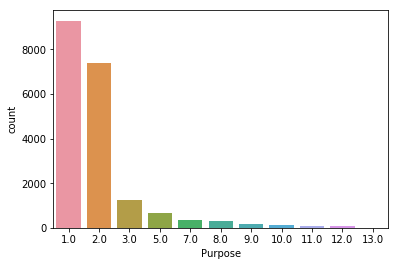

In [47]:
sns.countplot(data=df_train, x='Purpose')
plt.show()

**Filling missing values on <'Purpose'> column with most occurences** 

In [48]:
df_train['Purpose'].fillna(value=1, inplace=True)

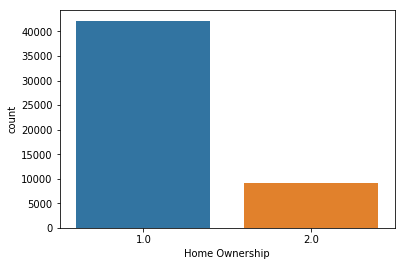

In [49]:
sns.countplot(data=df_train, x='Home Ownership')
plt.show()

In [50]:
df_train['Purpose'].astype('float64').dtypes

dtype('float64')

In [51]:
df_train['Home Ownership'].fillna(value=1, inplace=True)

In [52]:
df_train['Annual Income'] = df_train.apply(lambda x: linReg2.predict(x[x2_columns].values.reshape(1,5))[0][0] if np.isnan(x['Annual Income']) else x['Annual Income'], axis = 1)

In [53]:
y4 = df_train_na['Maximum Open Credit']
x4 = df_train_na['Current Credit Balance']

In [54]:
y4 = y4.values.reshape(5556,1)
x4 = x4.values.reshape(5556,1)

In [55]:
linReg4 = LinearRegression()

linReg4.fit(x4,y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
df_train['Maximum Open Credit'] = df_train.apply(lambda x: linReg4.predict(x['Current Credit Balance'].reshape(1,1)[0:1])[0] if np.isnan(x['Maximum Open Credit']) else x['Maximum Open Credit'], axis = 1)

df_train['Maximum Open Credit'].shape

(100000,)

In [57]:
x5_columns = ['Number of Credit Problems', 'Current Credit Balance']
y5 = df_train_na['Bankruptcies']
x5 = df_train_na[x5_columns]

y5 = y5.values.reshape(5556,1)
x5 = x5.values.reshape(5556,2)

linReg5 = LinearRegression()
linReg5.fit(x5,y5)


df_train['Bankruptcies'] = df_train.apply(lambda x: linReg5.predict(x[x5_columns].values.reshape(1,2))[0][0] if np.isnan(x['Bankruptcies']) else x['Bankruptcies'], axis=1)

df_train['Bankruptcies'].shape

(100000,)

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 17 columns):
index                        100000 non-null int64
Loan Status                  100000 non-null float64
Current Loan Amount          100000 non-null float64
Term                         100000 non-null float64
Credit Score                 100000 non-null float64
Annual Income                100000 non-null float64
Years in current job         100000 non-null float64
Home Ownership               100000 non-null float64
Purpose                      100000 non-null float64
Monthly Debt                 100000 non-null float64
Years of Credit History      100000 non-null float64
Number of Open Accounts      100000 non-null float64
Number of Credit Problems    100000 non-null float64
Current Credit Balance       100000 non-null float64
Maximum Open Credit          100000 non-null object
Bankruptcies                 100000 non-null float64
Tax Liens                    100000 non-null 

## For test set

### Loading test set

In [59]:

body = client_d796a7821cb14d9da275345dd74c86d6.get_object(Bucket='ibmcapstone-donotdelete-pr-dg5vjwlnynkxzq',Key='credit_test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_test = pd.read_csv(body)
df_test.head()


,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [60]:
df_test.columns

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [61]:
df_test['Term'].value_counts()

Short Term    7295
Long Term     2705
Name: Term, dtype: int64

In [62]:
df_test['Term'] = df_test['Term'].map({'Short Term': int('0'), 'Long Term': int('1')})

In [63]:
df_test['Term'].value_counts()

0.0    7295
1.0    2705
Name: Term, dtype: int64

In [64]:
df_test['Years in current job'] = df_test['Years in current job'].map({'10+ years': int('0'), '2 years': int('1'), '3 years': int('2'), '< 1 year': int('3'), '5 years': int('4'), '1 year': int('5'), '4 year': int('6'), '6 year': int('7'), '7 year': int('8'), '8 year': int('9'), '9 year': int('10')})

In [65]:
df_test['Years in current job'].value_counts()

0.0    3085
1.0     916
2.0     866
3.0     795
4.0     696
5.0     648
Name: Years in current job, dtype: int64

In [66]:
df_test['Home Ownership'].value_counts()

Home Mortgage    4867
Rent             4203
Own Home          914
HaveMortgage       16
Name: Home Ownership, dtype: int64

In [67]:
df_test['Home Ownership'] = df_test['Home Ownership'].map({'Home Ownership': int('0'), 'Rent': int('1'), 'Own Home': int('2'), 'HaveMortgage': int('3')})

df_test['Home Ownership'].value_counts()

1.0    4203
2.0     914
3.0      16
Name: Home Ownership, dtype: int64

In [68]:
df_test['Purpose'].value_counts()

Debt Consolidation      7878
Home Improvements        593
other                    561
Other                    308
Business Loan            163
Buy a Car                142
Medical Bills            113
Buy House                 70
major_purchase            52
Take a Trip               44
small_business            31
moving                    14
Educational Expenses      14
wedding                   10
vacation                   6
renewable_energy           1
Name: Purpose, dtype: int64

In [69]:
df_test['Purpose'] = df_test['Purpose'].map({'Dept Consolidation': int('0'), 'other': int('1'), 'Home Improvements': int('2'), 'Other': int('1'), 'Business Loan': int('2'), 'Buy a Car': int('3'), 'Medical bill': int('4'), 'Buy House': int('5'), 'Take a trip': int('6'), 'major_purchase': int('7'), 'small_business': int('8'), 'moving': int('9'), 'wedding': int('10'), 'vacation': int('11'), 'Educational_Expenses': int('12'), 'renewable_energy': int('13')})

df_test['Purpose'].value_counts()

1.0     869
2.0     756
3.0     142
5.0      70
7.0      52
8.0      31
9.0      14
10.0     10
11.0      6
13.0      1
Name: Purpose, dtype: int64

In [70]:
del(df_test['Loan ID'])
del(df_test['Customer ID'])

In [71]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 16 columns):
Current Loan Amount             10000 non-null float64
Term                            10000 non-null float64
Credit Score                    8019 non-null float64
Annual Income                   8019 non-null float64
Years in current job            7006 non-null float64
Home Ownership                  5133 non-null float64
Purpose                         1951 non-null float64
Monthly Debt                    10000 non-null float64
Years of Credit History         10000 non-null float64
Months since last delinquent    4694 non-null float64
Number of Open Accounts         10000 non-null float64
Number of Credit Problems       10000 non-null float64
Current Credit Balance          10000 non-null float64
Maximum Open Credit             10000 non-null float64
Bankruptcies                    9978 non-null float64
Tax Liens                       9999 non-null float64
dtypes: float64(16)

In [72]:
df_test.shape

(10353, 16)

In [73]:
del(df_test['Months since last delinquent'])
df_test_na = df_test.dropna()

df_test_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548 entries, 17 to 9980
Data columns (total 15 columns):
Current Loan Amount          548 non-null float64
Term                         548 non-null float64
Credit Score                 548 non-null float64
Annual Income                548 non-null float64
Years in current job         548 non-null float64
Home Ownership               548 non-null float64
Purpose                      548 non-null float64
Monthly Debt                 548 non-null float64
Years of Credit History      548 non-null float64
Number of Open Accounts      548 non-null float64
Number of Credit Problems    548 non-null float64
Current Credit Balance       548 non-null float64
Maximum Open Credit          548 non-null float64
Bankruptcies                 548 non-null float64
Tax Liens                    548 non-null float64
dtypes: float64(15)
memory usage: 68.5 KB


In [74]:
df_test_na.shape

(548, 15)

In [75]:
corr = df_test_na.corr()

In [76]:
corr

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,0.023418,-0.098984,0.025957,0.022115,-0.029904,0.062403,-0.020306,0.081005,0.063728,-0.044229,-0.021887,-0.014887,-0.024927,-0.044971
Term,0.023418,1.000000,0.081124,0.078387,-0.096820,0.074317,0.042947,0.156192,0.093470,0.049515,0.037025,0.122225,0.141295,-0.016422,0.015254
Credit Score,-0.098984,0.081124,1.000000,-0.044992,0.045331,0.029265,0.005389,-0.019394,0.000869,-0.030375,-0.003704,-0.015556,-0.028025,0.034921,-0.029809
Annual Income,0.025957,0.078387,-0.044992,1.000000,-0.107454,0.078313,0.030624,0.542157,0.159591,0.179875,0.045362,0.213715,0.207798,0.019960,0.017590
Years in current job,0.022115,-0.096820,0.045331,-0.107454,1.000000,-0.099305,-0.018411,-0.085781,-0.160091,-0.025871,-0.002691,-0.065362,-0.062739,-0.064005,0.017323
Home Ownership,-0.029904,0.074317,0.029265,0.078313,-0.099305,1.000000,-0.028035,0.135548,0.177032,0.085225,0.032587,0.106445,0.168110,0.002617,0.024197
Purpose,0.062403,0.042947,0.005389,0.030624,-0.018411,-0.028035,1.000000,-0.008392,-0.064941,-0.016776,0.107265,-0.026234,0.005420,0.006317,0.067141
Monthly Debt,-0.020306,0.156192,-0.019394,0.542157,-0.085781,0.135548,-0.008392,1.000000,0.171611,0.384698,0.115196,0.384031,0.275387,0.029726,0.134347
Years of Credit History,0.081005,0.093470,0.000869,0.159591,-0.160091,0.177032,-0.064941,0.171611,1.000000,0.168356,0.112862,0.083754,0.110727,0.097298,0.063155
Number of Open Accounts,0.063728,0.049515,-0.030375,0.179875,-0.025871,0.085225,-0.016776,0.384698,0.168356,1.000000,0.094964,0.040177,0.040477,0.076340,0.058678


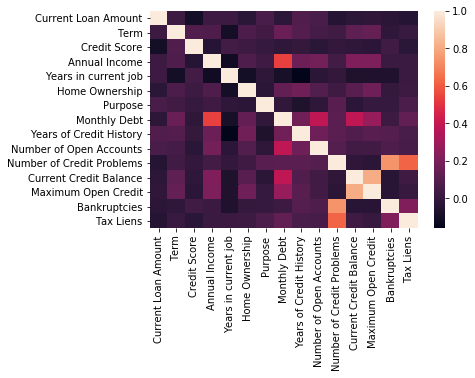

In [77]:
sns.heatmap(corr)

In [78]:
corr['Credit Score'][abs(corr['Credit Score']) > 0.1]

Credit Score    1.0
Name: Credit Score, dtype: float64

In [79]:
corr['Annual Income'][abs(corr['Annual Income']) > 0.1]

Annual Income              1.000000
Years in current job      -0.107454
Monthly Debt               0.542157
Years of Credit History    0.159591
Number of Open Accounts    0.179875
Current Credit Balance     0.213715
Maximum Open Credit        0.207798
Name: Annual Income, dtype: float64

In [80]:
corr['Years in current job'][abs(corr['Years in current job']) > 0.1]

Annual Income             -0.107454
Years in current job       1.000000
Years of Credit History   -0.160091
Name: Years in current job, dtype: float64

In [81]:
corr['Maximum Open Credit'][abs(corr['Maximum Open Credit']) > 0.1]

Term                       0.141295
Annual Income              0.207798
Home Ownership             0.168110
Monthly Debt               0.275387
Years of Credit History    0.110727
Current Credit Balance     0.811380
Maximum Open Credit        1.000000
Name: Maximum Open Credit, dtype: float64

In [82]:
corr['Bankruptcies'][abs(corr['Bankruptcies']) > 0.1]

Number of Credit Problems    0.746122
Bankruptcies                 1.000000
Tax Liens                    0.214948
Name: Bankruptcies, dtype: float64

In [83]:
corr['Tax Liens'][abs(corr['Tax Liens']) > 0.1]

Monthly Debt                 0.134347
Number of Credit Problems    0.619744
Bankruptcies                 0.214948
Tax Liens                    1.000000
Name: Tax Liens, dtype: float64

**Filling missing values with mean and median method**

In [84]:
df_test_na["Credit Score"].mean()

1096.9799270072992

In [85]:
df_test['Credit Score'] = df_test['Credit Score'].fillna(df_test_na["Credit Score"].mean())

In [86]:
df_test['Home Ownership'] = df_test.fillna(df_test_na['Home Ownership'].mode().iloc[0])

In [87]:
df_test['Term'].fillna(value=int('0'), inplace=True)

In [88]:
df_test['Purpose'].fillna(value= int('0'), inplace=True)

In [89]:
df_test['Current Loan Amount'] = df_test.fillna(df_test_na['Current Loan Amount'].mode().iloc[0])
df_test['Annual Income'] = df_test['Annual Income'].fillna(df_test_na["Annual Income"].mean())
df_test['Monthly Debt'] = df_test['Monthly Debt'].fillna(df_test_na["Monthly Debt"].mean())
df_test['Maximum Open Credit'] = df_test['Maximum Open Credit'].fillna(df_test_na["Maximum Open Credit"].mean())
df_test['Current Credit Balance'] = df_test['Current Credit Balance'].fillna(df_test_na["Current Credit Balance"].mean())
df_test['Years of Credit History'] = df_test.fillna(df_test_na['Years of Credit History'].mode().iloc[0])
df_test['Number of Open Accounts'] = df_test.fillna(df_test_na['Number of Open Accounts'].mode().iloc[0])
df_test['Number of Credit Problems'] = df_test.fillna(df_test_na['Number of Credit Problems'].mode().iloc[0])
df_test['Bankruptcies'] = df_test.fillna(df_test_na['Bankruptcies'].mode().iloc[0])
df_test['Tax Liens'] = df_test.fillna(df_test_na['Tax Liens'].mode().iloc[0])

In [90]:
df_test['Years in current job'] = df_test['Years in current job'].map({'10+ years': int('0'), '2 years': int('1'), '3 years': int('2'), '< 1 year': int('3'), '5 years': int('4'), '1 year': int('5'), '4 year': int('6'), '6 year': int('7'), '7 year': int('8'), '8 year': int('9'), '9 year': int('10')})

In [91]:
y3 = df_test_na['Years in current job']
x3 = df_test_na['Years of Credit History']

y3 = y3.values.reshape(548,1)
x3 = x3.values.reshape(548,1)

logReg3 = LogisticRegression()

logReg3.fit(x3,y3)

df_test['Years in current job'] = df_test.apply(lambda x: logReg3.predict(x['Years of Credit History'].reshape(1,1)[0:1])[0] if np.isnan(x['Years in current job']) else x['Years in current job'], axis = 1)

df_test['Years in current job'].shape

(10353,)

In [92]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 15 columns):
Current Loan Amount          10353 non-null float64
Term                         10353 non-null float64
Credit Score                 10353 non-null float64
Annual Income                10353 non-null float64
Years in current job         10353 non-null float64
Home Ownership               10353 non-null float64
Purpose                      10353 non-null float64
Monthly Debt                 10353 non-null float64
Years of Credit History      10353 non-null float64
Number of Open Accounts      10353 non-null float64
Number of Credit Problems    10353 non-null float64
Current Credit Balance       10353 non-null float64
Maximum Open Credit          10353 non-null float64
Bankruptcies                 10353 non-null float64
Tax Liens                    10353 non-null float64
dtypes: float64(15)
memory usage: 1.2 MB


In [93]:
# Convert DataFrame into array.
x_train = df_train.drop(labels='Loan Status', axis=1).values
y_train = df_train['Loan Status'].values
x_test = df_test.values

In [94]:
y_train.shape

(100000,)

## Scaling data sets

In [95]:
#Let us apply scaling on the dataset.


sc_X=StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)

## DIMENSIONALITY REDUCTION
We are doing this to reduce the number of dimensions/features in the dataset.
The features which have less effect on the prediction , we will remove those features.
It also boosts the process.
It saves time.
Here we will use Principal Component Analysis (PCA) with 'rbf' kernel.

### PCA

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.84796768e-001, 1.48352426e-001, 7.50158193e-002, 7.34647594e-002,
       7.09847034e-002, 6.59371984e-002, 3.79635129e-002, 2.68092570e-002,
       1.66755550e-002, 1.25165113e-031, 9.29439277e-034, 2.63442002e-038,
       3.91285497e-040, 1.27411568e-142, 5.03502976e-159])

In [97]:
pca = PCA(n_components=10)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

## APPLY LOGISTIC REGRESSION AND RANDOM FOREST MODEL AND CHECK ACCURACY FOR EACH MODEL AND SELECT THE BEST ONE.
### 1). Apply Logistic Regression

In [98]:
# Apply Logistic regression
    # First step is to train our model .

classifier_logi = LogisticRegression()
classifier_logi.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [99]:
# Let us check the accuracy of the model with k-cross validation.
accuracy = cross_val_score(estimator=classifier_logi, X=x_train, y=y_train, cv=10)
print(f"The accuracy of the Logistic Regressor Model is \t {accuracy.mean()}")
print(f"The deviation in the accuracy is \t {accuracy.std()}")

The accuracy of the Logistic Regressor Model is 	 0.8733299387448993
The deviation in the accuracy is 	 0.002746962231176958


### 2). Apply Random Forest Model

In [100]:
# Train Model
classifier_ran = RandomForestClassifier()
classifier_ran.fit(x_train,y_train)

# Check the accuracy and deviation in the accuracy
accuracy = cross_val_score(estimator=classifier_ran, X=x_train, y=y_train, cv=10)
print(f"The accuracy of the Random Forest Model is \t {accuracy.mean()}") 
print(f"The deviation in the accuracy is \t {accuracy.std()}")

The accuracy of the Random Forest Model is 	 0.8616299346732994
The deviation in the accuracy is 	 0.012799244221756064


## Here we will choose Logistic Regression model.

In Logistic Regression we are getting the accuracy of 87% .
Here deviation in the accuracy is 2%, means if we predict on new values then our accuracy will lies in range of 85% to 87% .
It also indicates that the problem is Linear.
By this We can eliminate all other models.

In [101]:
print(np.unique(y_train))
print(y_train[:10])
print("Here 0 indicates 'Fully Paid'. And 1 indicates 'Charged Off' ")

[0. 1.]
[0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
Here 0 indicates 'Fully Paid'. And 1 indicates 'Charged Off' 


## Test Set Prediction

In [102]:
y_pred = classifier_logi.predict(x_test)

# Let us convert 1 and 0 into Fully Paid and Charged off respectively
y_pred = list(map(lambda x: 'Fully Paid' if x==0 else 'Charged Off' ,y_pred))
y_pred = np.array(y_pred)
y_pred[:5]

array(['Charged Off', 'Charged Off', 'Fully Paid', 'Fully Paid',
       'Charged Off'], dtype='<U11')